# Graph Theory and Coloring
## Lecture 6

Def: A _graph_ G is a pair of sets (V, E) where V is a non-empty set of items called vertices or nodes.  E is a set of 2-item subsets of V called edges.

$$V = \{x_1, x_2, x_3, ..., x_7\}$$

$$E = \{ \{x_1, x_2\}, \{x_2, x_3\}, ... , \{x_5, x_7\}\} $$

Edges also represented as $x_1-x_2$

Can have a graph with no edges.  For example:

$$ G = (V,E)$$
$$V = \{x_1, x_2, x_3\}$$
$$E = \{\} $$

Def: Two nodes x_i and x_j are _adjacent_ if they are connected by an edge, i.e. $\{x_i, x_j\} \in E$.

Def: An edge $E = \{x_i, x_j\}$ is said to be _incident_ to its nodes x_i and x_j.

Def: The number of edges incident to a node is called the _degree_ of the node.

Def: A graph is _simple_ if it has no loops or multiple edges.

Def: A loop connects a node to itself.

Def: A multi-edge is two edges that connect the same two nodes.

### Bipartite graph

On average, do men or women have more sexual partners?

$Men   \ \ \ \  \ \ \ \   Women$

$|V| = 300 \text{ million}$

$V_m = 147 \text{ million}$
$V_w = 153 \text{ million}$

$$A_m = \frac{|E|}{|V_m|}$$

$$A_w = \frac{|E|}{|V_w|}$$

$$\frac {A_m} {A_w} = \frac {\frac{|E|}{|V_m|}} {\frac{|E|}{|V_w|}} = \frac{|V_w|}{|V_m|} = \frac{153}{147}$$

### Graph Coloring Problem

Given a graph G and K colors, assign a color to each node so adjacent nodes get different colors.

Def: The minimum value of K for which such a coloring exists is called the chromatic number of G.  We call that $\chi(G)$.

No known efficient algorithm for finding the chromatic number.

NP-completeness problem.  If somebody gave you a solution, it's easy to check it's valid.  But figuring it out is really hard.  If you can solve one of these NP-complete problems, it will be fast to solve all the rest of the NP-complete problems.  You'd also win a million dollar prize.

Any thoughts on a simple algorithm?
- Find a node with high degree.

#####Basic graph coloring algorithm for $G = (V,E)$
1. Order the nodes $V_1, V_2, ..., V_n$
2. Order the colors $C_1, C_2, ...,$ 
3. `for i = 1,2,...,n`
    
    -`Assign the lowest legal color to V`
    
His senior thesis was on graph coloring algorithms.  Students wanted to have exams before Christmas.  Faculty said no, there's no way you can fit all the exams in a week.  He did the graph and actually you could schedule the exams so they took 4 and a half days.


Thm: If every n-node in $G$ has degree $\leq d$, then the Basic Alg uses at most $d+1$ colors.

Pf: By induction.
- Base case: $n=1 \Rightarrow 0$ edges.  $d = 0$.  1 color $= d+1.$ Check.
- Inductive step: Assume P(n) is true for induction.  Let $G = (V,E)$ be any (n+1)-node graph.  Let $d=$ max degree in $G$.

Order the nodes V_1, V_2, ..., 
Remove the $n+1$ from $G$ to create $G' = (V',E')$


Often you can use much less colors than $d+1$ colors.

The bipartite graph and a star graph are prime examples.

The basic graph coloring algorithm can do very bad on some graphs.

The nasty example for the basic algorithm is when you have a bipartite graph where all of the edges exist except for the one straight across.  If you use a numbering which successively jumps across the bipartite graph, then you may end up with n/2 colors. (Very bad!)

Bipartite graphs can always (obviously) be colored with 2 colors.  But nobody knows how to decide whether or not you can color a graph with 3 colors!

### Create an undirected graph structure

In [289]:
import numpy as np

def RandMatrix(m=5):
    rand = np.random.rand(m,m)
    for i in range(len(rand)):
        for j in range(len(rand[0])):
            rounded = int(rand[i,j] + 0.5)
            rand[i,j] = rounded
    return rand

def DeleteDiag(matrix):
    for i in range(len(matrix)):
        matrix[i,i] = 0
    return matrix

def DirectedGraph(m=5):
    rand = RandMatrix(m)
    rand = DeleteDiag(rand) # no self-connections
    return rand

def UndirectedGraph(m=5):
    rand = DirectedGraph(m)
    for i in range(len(rand)):
        for j in range(len(rand[0])):
            if i>j:
                rand[i,j] = rand[j,i]
    return rand
    
#print DirectedGraph()
m = 10
testGraph = UndirectedGraph(m)
print testGraph

[[ 0.  0.  0.  0.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  1.  1.  0.  1.  1.  1.  1.  1.]
 [ 0.  1.  0.  0.  0.  0.  1.  0.  1.  1.]
 [ 0.  1.  0.  0.  0.  1.  1.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 1.  1.  0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  1.  1.  1.  0.  0.  0.  1.  1.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  1.  1.  0.  0.]]


### Plot the undirected graph structure

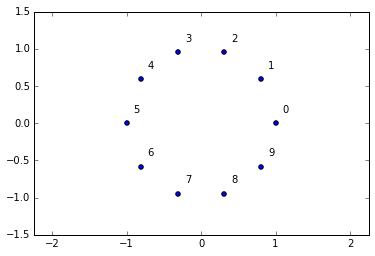

In [282]:
import matplotlib.pyplot as plt
from pylab import axes
import numpy as np
%matplotlib inline
from math import *
# Plot each node in a circle

# Find the number of nodes (=m)

# Divide 2pi by the number of nodes
arc = 2*pi / m

# Assign a unique x,y position to each node
xnode = np.zeros(m)
ynode = np.zeros(m)
for i in range(m):
    xnode[i] = cos(arc*i)
    ynode[i] = sin(arc*i)
    
# Plot the nodes in a circle
plt.scatter(xnode,ynode)

# Label the nodes
for i in range(m):
    plt.text(xnode[i]+.1,ynode[i]+.15, i)

axes().set_aspect('equal', 'datalim')
plt.show()



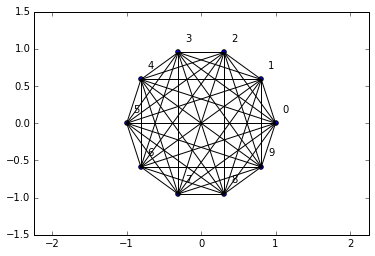

In [283]:
# Draw lines between each node

for xi1, yi1 in zip( range((len(xnode))), range((len(ynode))) ):
    for xi2, yi2 in zip( range((len(xnode))), range((len(ynode))) ):
        if xi2 > xi1:
            x1 = xnode[xi1]; y1 = ynode[yi1]
            x2 = xnode[xi2]; y2 = ynode[yi2]
            plt.plot([x1,x2],[y1,y2], color='black')
plt.scatter(xnode,ynode)
# Label the nodes
for i in range(m):
    plt.text(xnode[i]+.1,ynode[i]+.15, i)
axes().set_aspect('equal', 'datalim')
plt.show()            

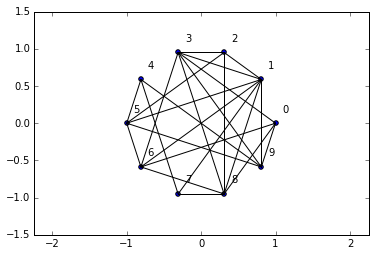

In [284]:
# Draw lines between nodes only if they were connected in the 
# undirected graph structure

for xi1, yi1 in zip( range((len(xnode))), range((len(ynode))) ):
    for xi2, yi2 in zip( range((len(xnode))), range((len(ynode))) ):
        if xi2 > xi1:
            if testGraph[xi1,xi2]:
                x1 = xnode[xi1]; y1 = ynode[yi1]
                x2 = xnode[xi2]; y2 = ynode[yi2]
                plt.plot([x1,x2],[y1,y2], color='black')
plt.scatter(xnode,ynode)
# Label the nodes
for i in range(m):
    plt.text(xnode[i]+.1,ynode[i]+.15, i)
axes().set_aspect('equal', 'datalim')
plt.show() 

[ 2.  9.  1.  1.  9.  4.  3.  6.  5.  1.]


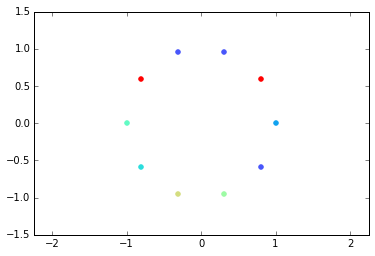

In [285]:
# Color each node randomly

import matplotlib.cm as cm

c = np.zeros(m)
for i in range(m):
     c[i] = int(np.random.rand()*m)
        
print c

colors = cm.rainbow(np.linspace(0, 1, m))                   
for x, y, nodeColor in zip(xnode, ynode, c):
     plt.scatter(x, y, color=colors[nodeColor])
axes().set_aspect('equal', 'datalim')
plt.show()

#####Basic graph coloring algorithm for $G = (V,E)$
1. Order the nodes $V_1, V_2, ..., V_n$
2. Order the colors $C_1, C_2, ...,$ 
3. `for i = 1,2,...,n`
    
    -`Assign the lowest legal color to V`

[[ 0.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.
   1.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.
   1.  1.]
 [ 1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.
   0.  1.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  0.
   1.  0.]
 [ 0.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.
   0.  0.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.
   1.  0.]
 [ 0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.
   0.  0.]
 [ 1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.
   0.  1.]
 [ 1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  1.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.
   0.  0.]
 [ 1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.
   1.  1.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.

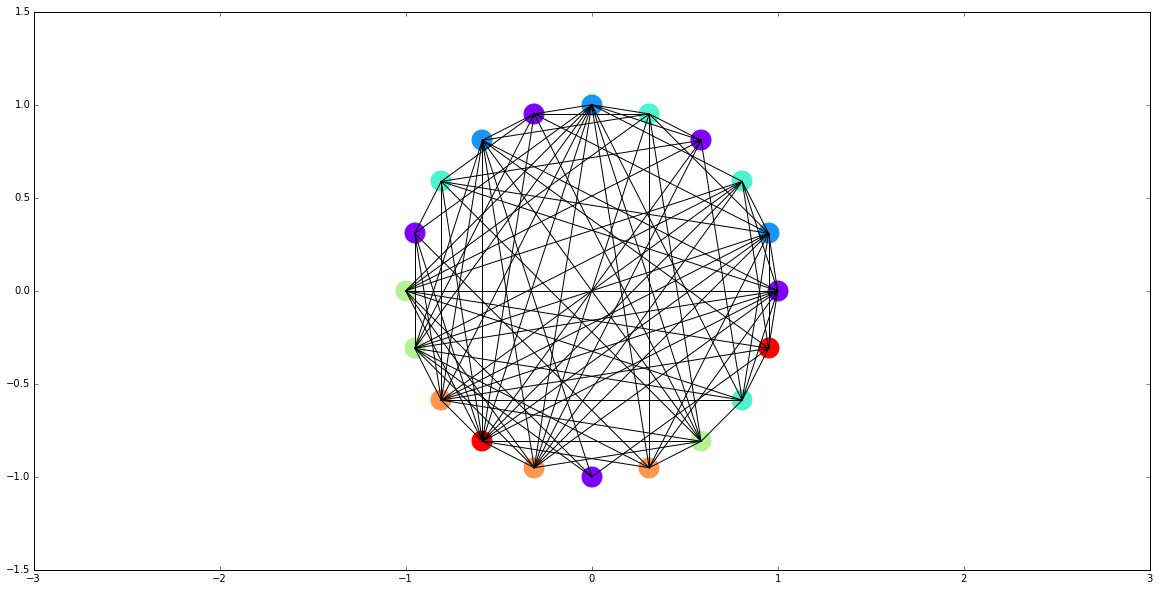

In [295]:
# Implement basic coloring algorithm

def basicColorGraph(graph):
    plt.figure(figsize=(20,10))
    m = len(graph)
    # initialize a color vector
    c = np.zeros(m)
    c[:] = m-1
        
    # Divide 2pi by the number of nodes
    arc = 2*pi / m

    # Assign a unique x,y position to each node
    xnode = np.zeros(m)
    ynode = np.zeros(m)
    for i in range(m):
        xnode[i] = cos(arc*i)
        ynode[i] = sin(arc*i)
    
    # Plot a line if connected
    for xi1, yi1 in zip( range((len(xnode))), range((len(ynode))) ):
        for xi2, yi2 in zip( range((len(xnode))), range((len(ynode))) ):
            if xi2 > xi1:
                if graph[xi1,xi2]:
                    x1 = xnode[xi1]; y1 = ynode[yi1]
                    x2 = xnode[xi2]; y2 = ynode[yi2]
                    plt.plot([x1,x2],[y1,y2], color='black')
    plt.scatter(xnode,ynode)
    ## Label the nodes
    #for i in range(m):
    #    plt.text(xnode[i]+.1,ynode[i]+.15, i)
      
    # initialize color vector
    colorNames = np.linspace(0,m-1,m)
    # only needs to be length d+1!  but first would need to compute max. degree
    
    ### COLORING ALGORITHM ###
    # For each node
    for x in range(m):
        for colorName in colorNames:
            legal = True
            for y in range(m):
                if i != y:
                    if graph[x,y]:
                        if c[y] == colorName:
                            legal = False
                            break
            if legal:
                # Assign lowest legal color
                c[x] = colorName
                break
    K = max(c) + 1
    print "I used " + str(int(K)) + " colors!"
    
    # More clear coloring: determine K, then create the color vector
    colors = cm.rainbow(np.linspace(0, 1, K)) 
    
    # Plot the colored nodes!
    for x, y, nodeColor in zip(xnode, ynode, c):
        plt.scatter(x, y, color=colors[nodeColor], s=400)
        
    ## Label the node colors
    # for i in range(m):
    #    plt.text(xnode[i]-.1,ynode[i]-.15, c[i])

    axes().set_aspect('equal', 'datalim')
    plt.show()
    

        
coloredGraph = UndirectedGraph(20)
print coloredGraph
basicColorGraph(coloredGraph)

In [288]:
### Stochastic ordering for the basic coloring algorithm

## Ensure I can get random interegers
#m = 1000
#randvec = m*np.random.rand(m)
#for i in range(m): randvec[i] = int(randvec[i] + 0.5)
#n, bins, patches = plt.hist(randvec[:], 20, normed=1, facecolor='green', alpha=0.75)

def BasicOrder(m):
    order = np.linspace(0,m-1,m)
    return order

# Not yet implemented
def RandomOrder(m):
    options = np.linspace(0,m-1,m)
    order = 10*np.ones(m)        
    return order
    
# Not yet implemented
print RandomOrder(10)





[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]


### Future work

What happens if we try every possible ordering for the graph coloring algorithm?

What happens if we stochastically choose the ordering for the graph coloring algorithm?

Can I simulate the dynamics of each node being attached to the others via a string?
